# Physical Activity and Dailiy Life

Cole Elfstrom  
Gonzaga University  
CPSC 222: Introduction to Data Science 

## Introduction:  

Why and How:  
* I am very active and thought it would be very cool to visualize and understand patterns in my activity, so I chose to examine my apple health data  
* The file is downloaded as a very readable CSV file  
* The tables include collections of the date along with the number of steps, flights climbed, speed walked, distance walked, step length etc.
* Apple tracks using the GPS in the IPhone
* There are 90 instances in every column, 3 months worth of data
* We are goung to try to classify if I take a lot of steps and if I climb a lot of stairs compared to the average
* The impact of the results are understaning how my phsyical activity is tied to the day of the week and my general bussiness during the day
* The only true stakeholder is myself, but anyone interested in how their walking habits effect other things could be interested

### Import data and begin cleaning  

The data was already very clean, as we only took measurements from the last 90 days and there was data for every day, thus the only cleaning required is converting any floats into more workable integers

In [1]:
import pandas as pd
import utils

# import the data and parse into lists
health_df = pd.read_csv("health_data.csv")
steps = health_df["Step Count"]
stairs = health_df["Flights Climbed"]
date = health_df["Date"]
speed = health_df["Speed"]
distance = health_df["Distance"]

# clean the data
steps = utils.clean_data(steps)
stairs = utils.clean_data(stairs)


# merge the data
days_df = pd.read_csv("days_of_week.csv")
merged_df = health_df.merge(days_df, on="Date")
merged_df.to_csv("merged_day_health.csv")

# split, apply, and combine data
grouped_by_day, mean_steps = utils.split_apply_combine(merged_df, "Step Count")
grouped_by_day, mean_stairs = utils.split_apply_combine(merged_df, "Flights Climbed")
grouped_by_day, mean_speed = utils.split_apply_combine(merged_df, "Speed")
grouped_by_day, mean_distance = utils.split_apply_combine(merged_df, "Distance")

# group mean data by days
steps_by_day = utils.group_days(mean_steps)
stairs_by_day = utils.group_days(mean_stairs)
speed_by_day = utils.group_days(mean_speed)
distance_by_day = utils.group_days(mean_distance)

## Data Analysis:  
* The only cleaning truly required was changinging some float values to integer values
* I merged the tables by using the built in pandas DataFrame merge and it worked perfectly
* The usual challenges with data preperation are dealing with missing values and turning it into a workable form
* I am aggregating my data into categories based on the day of the week
* I am going to plot the data into bar charts, to show the relationship between day/date easily

### Plot the data  
Below we are going to see a visualization of both the steps and flights climbed over the last 90 days,  
as well as the mean steps per day of the week

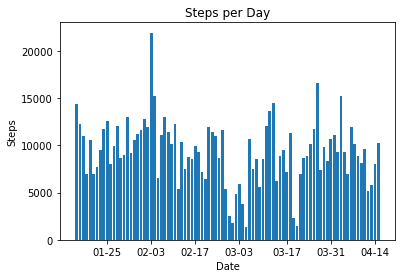

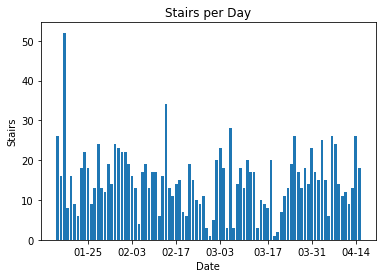

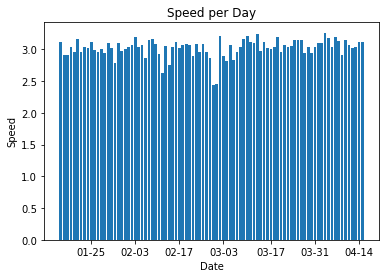

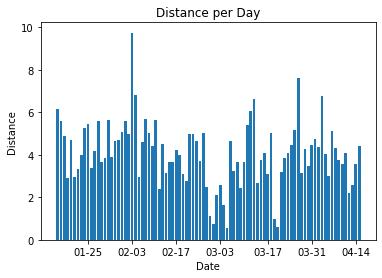

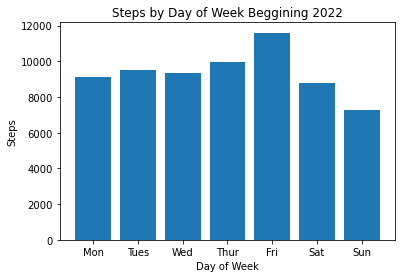

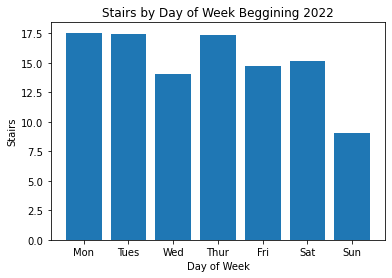

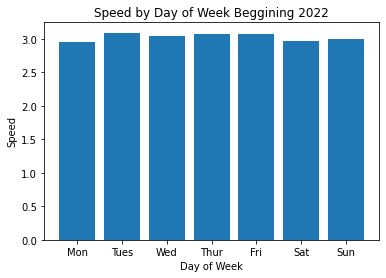

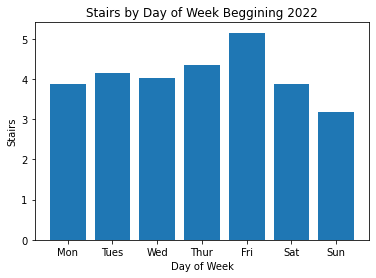

In [2]:
import matplotlib.pyplot as plt

utils.plot_by_day(date, steps, "Steps")
utils.plot_by_day(date, stairs, "Stairs")
utils.plot_by_day(date, speed, "Speed")
utils.plot_by_day(date, distance, "Distance")
utils.plot_by_day_of_week(steps_by_day, "Steps")
utils.plot_by_day_of_week(stairs_by_day, "Stairs")
utils.plot_by_day_of_week(speed_by_day, "Speed")
utils.plot_by_day_of_week(distance_by_day, "Stairs")


## Categorizing Data  
Seperate amount of steps and amount flights climbed into two categories: High (many) versus Low (few)

In [3]:
steps_cat = utils.categorize_high_low(steps)
stairs_cat = utils.categorize_high_low(stairs)
speed_cat = utils.categorize_high_low(speed)
dist_cat = utils.categorize_high_low(distance)
merged_df["H/L Steps"] = steps_cat
merged_df["H/L Flights"] = stairs_cat
merged_df["H/L Speed"] = speed_cat
merged_df["H/L Distance"] = dist_cat
grouped_by_day, mean_hl_steps = utils.split_apply_combine(merged_df, "H/L Steps")
grouped_by_day, mean_hl_flights = utils.split_apply_combine(merged_df, "H/L Flights")
grouped_by_day, mean_hl_speed = utils.split_apply_combine(merged_df, "H/L Speed")
grouped_by_day, mean_hl_dist = utils.split_apply_combine(merged_df, "H/L Distance")
mean_hl_flights = mean_hl_flights * 90
mean_hl_steps = mean_hl_steps * 90
mean_hl_speed = mean_hl_speed * 90
mean_hl_dist = mean_hl_dist * 90
for i in range(len(mean_hl_steps)):
    mean_hl_steps[i] = int(mean_hl_steps[i])
for i in range(len(mean_hl_flights)):
    mean_hl_flights[i] = int(mean_hl_flights[i])
steps_hl_by_day = utils.group_days(mean_hl_steps)
flights_hl_by_day = utils.group_days(mean_hl_flights)
speed_hl_by_day = utils.group_days(mean_hl_speed)
dist_hl_by_day = utils.group_days(mean_hl_dist)


### Hypothesis Testing  
We are going to test whether or not the amount of steps correlates to the amount of flights of stairs climbed in a day

#### Test 1:  
Are the amount of steps I take correlated to the amount of stairs I climb:  
$$ H_0: \mu _1 = \mu _2 $$
$$ H_1: \mu _1 = \mu _2 $$

In [4]:
utils.hypothesis_test(steps_cat, stairs_cat)

t: 0.7728618480955122 pval: 0.220825938355953
do not reject H0


#### Test 2:  
Are the amount of steps I take on a given day of the week correlated to the amount of stairs I climb on a given day of the week:  
$$ H_0: \mu _1 = \mu _2 $$
$$ H_1: \mu _1 = \mu _2 $$

In [5]:
utils.hypothesis_test(steps_hl_by_day, flights_hl_by_day)

t: 1.161895003862225 pval: 0.14470161242339505
do not reject H0


#### Test 3:  
Are the amount of steps I take correlated to the distance I walk: (I would assume yes)  
$$ H_0: \mu _1 = \mu _2 $$
$$ H_1: \mu _1 = \mu _2 $$

In [6]:
utils.hypothesis_test(steps_cat, dist_cat)

t: 0.0 pval: 0.5
do not reject H0


#### Test 4:  
Are the amount of steps I take on a given day of the week correlated to the speed I walk on a given day of the week:  
$$ H_0: \mu _1 = \mu _2 $$
$$ H_1: \mu _1 = \mu _2 $$

In [7]:
utils.hypothesis_test(speed_hl_by_day, steps_hl_by_day)

t: 1.3388655461623689 pval: 0.11455378643547857
do not reject H0


### Machine Learning  
Now we are going to creat some models to predicit if I take more steps, walk more miles, etc. 
 
We are using the high or low attributes mentioned above, and since they are based on the mean it is split about 50/50  

The predicitions should be fairly easy, as there is obvious correlation between steps and distance, as well as speed and distance  

Some of the challenges with classification in this model are the small data set and also the lack of true correlation between flights and steps

In [8]:
utils.create_model(merged_df, "H/L Speed")
utils.create_model(merged_df, "H/L Steps")
utils.create_model(merged_df, "H/L Distance")
utils.create_model(merged_df, "H/L Flights")

H/L Speed  KNN Accuracy: 0.6521739130434783
H/L Speed  Decision Tree Accuracy: 1.0
H/L Steps  KNN Accuracy: 0.9565217391304348
H/L Steps  Decision Tree Accuracy: 1.0
H/L Distance  KNN Accuracy: 0.9565217391304348
H/L Distance  Decision Tree Accuracy: 1.0
H/L Flights  KNN Accuracy: 0.7391304347826086
H/L Flights  Decision Tree Accuracy: 1.0


## Conclusion:  

To sum up, the apple health data was very interesting to examine, and I had some suspisions confirmed and other revelations come up.  
  
Pros:
  * Easy to aggregate into days and weeks
  * Data was comparable to eachother
  * Data came in a very clean format  
  
Cons:
  * Could not get a very large range of data
  * Not the most telling data  

I decided to test both a Knn and Decision tree model to try to predict my data, and while the Decision tree worked alarmingly well (?), the Knn classifier was moderately accurate.  

The ethical implications of this project are not very large, but some possible implications could be trying to trick apple into thinking I am walking, or trying to increase my walking speed to increase the predicted distance
